Nombre de noeuds : 3
Nombre de elements : 2
 ### Debut de l'assemblage ###
### Fin de l'assemblage ###
determinant : 0.0
k :  [[ 2.4e+14  0.0e+00 -1.2e+14  6.0e+13]
 [ 0.0e+00  8.0e+13 -6.0e+13  2.0e+13]
 [-1.2e+14 -6.0e+13  1.2e+14 -6.0e+13]
 [ 6.0e+13  2.0e+13 -6.0e+13  4.0e+13]]
[-20000.              0.         -10400.           1666.66666667]
[-1.45000000e-09 -2.39333333e-09 -4.10666667e-09 -2.74666667e-09]
U :
 [ 0.00000000e+00  0.00000000e+00 -1.45000000e-09 -2.39333333e-09
 -4.10666667e-09 -2.74666667e-09]


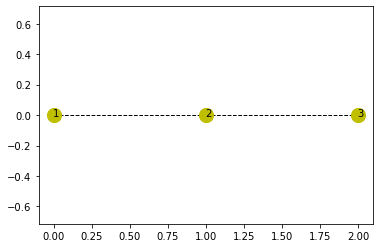

In [53]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

### Etape 1 : on defini notre geometrie
cas = 1
%run src\Cas_Test.ipynb
%run src\Fonctions.ipynb

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)
    
geom(NL)
#plot_forces( NL, F)

### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales

E = 12e9 # Module D'Young [en Pa]
rho = 7800 
L = 1
h = 10 # hauteur [en m]
b = 10 #largueur [en m]
S = b*h # Section [en m^2]
I = b*h**3/12 # Inertie [en m]
q = 20000 # Charge repartie (en N/m)

K_elem = E*I/L**3*np.array([[12, 6*L , -12, 6*L],
                            [6*L, 4*L**2 , -6*L, 2*L**2],
                            [-12, -6*L, 12, -6*L],
                            [6*L, 2*L**2 , -6*L , 4*L**2]])

M_elem = rho*S*L/420*np.array([[156, 22*L, 54, -13*L],
                              [22*L,4*L**2, 13*L, -3*L**2],
                              [54, 13*L, 256, -22*L],
                              [-13*L, -3*L**2, -22*L, 4*L**2]])

def K_elem(L_e) :
    K_elem = E*I/L_e**3*np.array([[12, 6*L , -12, 6*L],
                            [6*L, 4*L**2 , -6*L, 2*L**2],
                            [-12, -6*L, 12, -6*L],
                            [6*L, 2*L**2 , -6*L , 4*L**2]])
    return K_elem

### Etape 3 : On passe la matrice de raideur dans les coordonnees globale (on fait des rotations)

matrices_de_passage = changement_coord(NL,EL)
K_glob = assemblage_2D(matrices_de_passage,NL,EL)

BC = np.array([[0. , 0., 0., 0.],
              [0. , 0., 0., 0.],
              [1. , 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0.,0., 1.]])
F = np.array([0, 0, 0, 0, -400, 0])
Q = distributed_load_Flexion(NoN,NoE,q)
F = F + Q.flatten()
#BC = bc(NoN)
#F = apply_forces_poutre(NoN)
#plot_forces( NL, F)
#F = F.flatten()

K_glob_r = np.transpose(BC).dot(K_glob).dot(BC)
print("k : ",K_glob_r)
F_r = np.transpose(BC).dot(F)
print(F_r)
U_r = inv(K_glob_r).dot(F_r)
#try :    
#except : 
#print("Attention Matrice singulière (contient un zéro dans ces termes diagonaux). Manque de condition limite")
print(U_r)
U = BC.dot(U_r)
print("U :\n",U)

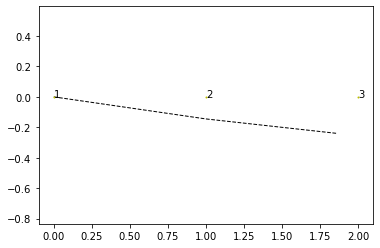

In [59]:
### Etape 10 : Affichage
scale = 1e8

#plt.scatter(NL[:,0],NL[:,1])
#plt.scatter(NL[:,0]+scale*U[::2].flatten(),NL[:,1]+scale*U[1::2])

plot_disp(NL,U,scale)
#geom(NL)
#plot_stress(NL,U)
#norm_x = Normalize(np.abs(color.min()),np.abs(color.max()))

### Sources 

* [1]: <https://www.yyy> Vidéo modélisation poutre de Euler Bernoulli
* [2]: <https://www.youtube.com/watch?v=eReuOiF_96k> Vidéo modélisation poutre de Timoshenko
